<ipython-input-1-f4d9f60f822a>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2 Score", data=results_df, palette="coolwarm")


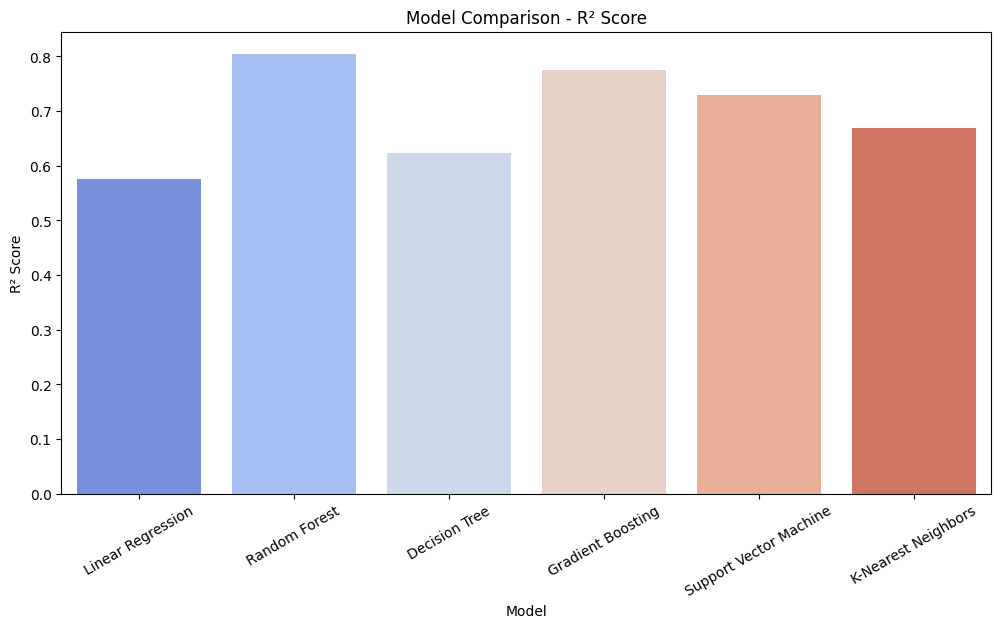

Model Performance:
                     Model  R2 Score      RMSE       MAE
0       Linear Regression  0.575788  0.745581  0.533200
1           Random Forest  0.805024  0.505468  0.327613
2           Decision Tree  0.622811  0.703045  0.453784
3       Gradient Boosting  0.775643  0.542217  0.371650
4  Support Vector Machine  0.728941  0.595985  0.397763
5     K-Nearest Neighbors  0.668950  0.658643  0.445525


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Handle missing values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_imputed.drop(columns=['target']))
df_scaled = pd.DataFrame(scaled_features, columns=data.feature_names)
df_scaled['target'] = df_imputed['target']

# Train-Test Split
X = df_scaled.drop(columns=['target'])
y = df_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Store results
results = []

# Train & Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results.append({"Model": name, "R2 Score": r2, "RMSE": rmse, "MAE": mae})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot Model Performance
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="R2 Score", data=results_df, palette="coolwarm")
plt.xticks(rotation=30)
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.show()

print("Model Performance:\n", results_df)


In [2]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Random Forest Hyperparameter Tuning
rf_params = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_params, n_iter=10, scoring='r2', cv=3, verbose=1, random_state=42, n_jobs=-1)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_

# Gradient Boosting Hyperparameter Tuning
gb_params = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

gb_search = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), gb_params, n_iter=10, scoring='r2', cv=3, verbose=1, random_state=42, n_jobs=-1)
gb_search.fit(X_train, y_train)
best_gb = gb_search.best_estimator_

# Evaluate Best Models
models = {
    "Random Forest (Tuned)": best_rf,
    "Gradient Boosting (Tuned)": best_gb
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("R² Score:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE:", mean_absolute_error(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Random Forest (Tuned)
R² Score: 0.8055624718685006
RMSE: 0.5047699303350829
MAE: 0.3266232079280616

Gradient Boosting (Tuned)
R² Score: 0.8229095996401812
RMSE: 0.48172694609268235
MAE: 0.3225433785352008
